In [47]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
os.chdir("/Users/wrushabhgonnade/Downloads/Downloads/Flight")

In [4]:
df_Train=pd.read_excel("Data_Train.xlsx")
df_Test=pd.read_excel("Test_set.xlsx")
print(df_Train.shape)
print(df_Test.shape)

(10683, 11)
(2671, 10)


In [5]:
combo_df=df_Train.append(df_Test,sort=False)

In [6]:
combo_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [7]:
combo_df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
combo_df.shape

(13354, 11)

In [9]:
combo_df['Day']=combo_df['Date_of_Journey'].str.split('/').str[0]
combo_df['Month']=combo_df['Date_of_Journey'].str.split('/').str[1]
combo_df['Year']=combo_df['Date_of_Journey'].str.split('/').str[2]

In [10]:
combo_df.drop('Date_of_Journey',axis=1,inplace=True)

In [11]:
combo_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [12]:
combo_df['Route1']=combo_df['Route'].str.split('→ ').str[0]
combo_df['Route2']=combo_df['Route'].str.split('→ ').str[1]
combo_df['Route3']=combo_df['Route'].str.split('→ ').str[2]
combo_df['Route4']=combo_df['Route'].str.split('→ ').str[3]
combo_df['Route5']=combo_df['Route'].str.split('→ ').str[4]

combo_df.drop('Route',axis=1,inplace=True)

In [13]:
combo_df.head(3)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN


In [14]:
combo_df['Arrival_Time']=combo_df['Arrival_Time'].str.split(' ').str[0]

In [15]:
combo_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,BLR,NAG,DEL,NaN,NaN


In [16]:
combo_df['Arrival_Hour']=combo_df['Arrival_Time'].str.split(':').str[0]
combo_df['Arrival_Minute']=combo_df['Arrival_Time'].str.split(':').str[1]
combo_df.drop('Arrival_Time',axis=1,inplace=True)

In [17]:
combo_df.head(3)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN,01,10
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN,13,15
2,Jet Airways,Delhi,Cochin,09:25,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN,04,25


In [18]:
combo_df['Departure_Hour']=combo_df['Dep_Time'].str.split(':').str[0]
combo_df['Departure_Minute']=combo_df['Dep_Time'].str.split(':').str[1]
combo_df.drop('Dep_Time',axis=1,inplace=True)

In [19]:
combo_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN,01,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN,13,15,05,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN,04,25,09,25


In [20]:
combo_df['Total_Stops']=combo_df['Total_Stops'].replace('non-stop','0 stops')

In [21]:
combo_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0 stops,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN,01,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN,13,15,05,50
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN,04,25,09,25


In [22]:
combo_df['Total_Stops']=combo_df['Total_Stops'].str.split(' ').str[0]

In [23]:
combo_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN,01,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN,13,15,05,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN,04,25,09,25


In [24]:
combo_df.drop('Duration',axis=1,inplace=True)

In [25]:
combo_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,03,2019,BLR,DEL,NaN,NaN,NaN,01,10,22,20
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,05,2019,CCU,IXR,BBI,BLR,NaN,13,15,05,50
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,06,2019,DEL,LKO,BOM,COK,NaN,04,25,09,25


In [26]:
combo_df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                2671
Day                     0
Month                   0
Year                    0
Route1                  1
Route2                  1
Route3               4341
Route4              11397
Route5              13296
Arrival_Hour            0
Arrival_Minute          0
Departure_Hour          0
Departure_Minute        0
dtype: int64

In [27]:
combo_df['Route1'].fillna('none',inplace=True)
combo_df['Route2'].fillna('none',inplace=True)
combo_df['Route3'].fillna('none',inplace=True)
combo_df['Route4'].fillna('none',inplace=True)
combo_df['Route5'].fillna('none',inplace=True)

In [28]:
combo_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            1
Additional_Info        0
Price               2671
Day                    0
Month                  0
Year                   0
Route1                 0
Route2                 0
Route3                 0
Route4                 0
Route5                 0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
dtype: int64

In [29]:
tot_stop_mode=combo_df['Total_Stops'].mode()
print("Mode for Total_Stops is: ",tot_stop_mode)

Mode for Total_Stops is:  0    1
dtype: object


In [30]:
print("Mode is 1, so we replace nan values with 1 in Total_Stops Column")

Mode is 1, so we replace nan values with 1 in Total_Stops Column


In [31]:
combo_df['Total_Stops'].fillna('1',inplace=True)
combo_df['Price'].fillna((combo_df['Price'].mean()),inplace=True)

In [32]:
combo_df.isnull().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Additional_Info     0
Price               0
Day                 0
Month               0
Year                0
Route1              0
Route2              0
Route3              0
Route4              0
Route5              0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [34]:
combo_df["Airline"]=label_encoder.fit_transform(combo_df['Airline'])
combo_df["Source"]=label_encoder.fit_transform(combo_df['Source'])
combo_df["Destination"]=label_encoder.fit_transform(combo_df['Destination'])
combo_df["Additional_Info"]=label_encoder.fit_transform(combo_df['Additional_Info'])
combo_df["Route1"]=label_encoder.fit_transform(combo_df['Route1'])
combo_df["Route2"]=label_encoder.fit_transform(combo_df['Route2'])
combo_df["Route3"]=label_encoder.fit_transform(combo_df['Route3'])
combo_df["Route4"]=label_encoder.fit_transform(combo_df['Route4'])
combo_df["Route5"]=label_encoder.fit_transform(combo_df['Route5'])

In [35]:
combo_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,3,0,5,0,8,3897.0,24,03,2019,0,13,30,13,5,01,10,22,20
1,1,3,0,2,8,7662.0,1,05,2019,2,25,1,3,5,13,15,05,50
2,4,2,1,2,8,13882.0,9,06,2019,3,32,4,5,5,04,25,09,25


In [36]:
df_Train=combo_df[0:10683]
df_Test=combo_df[10683:]

In [37]:
X=df_Train.drop('Price',axis=1)
y=df_Train['Price']

In [38]:
X.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,3,0,5,0,8,24,03,2019,0,13,30,13,5,01,10,22,20
1,1,3,0,2,8,1,05,2019,2,25,1,3,5,13,15,05,50
2,4,2,1,2,8,9,06,2019,3,32,4,5,5,04,25,09,25


In [39]:
y.head(3)

0     3897.0
1     7662.0
2    13882.0
Name: Price, dtype: float64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [41]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [42]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [43]:
features=X_train.columns[(model.get_support())]

In [44]:
features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day', 'Month', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour', 'Departure_Minute'],
      dtype='object')

In [45]:
X_train.drop('Year',axis=1,inplace=True)
X_test.drop('Year',axis=1,inplace=True)

In [46]:
X_train.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Route1,Route2,Route3,Route4,Route5,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
491,4,2,1,1,5,1,04,3,7,6,13,5,12,35,22,50
7610,4,3,0,1,8,24,05,2,7,3,13,5,04,40,20,00
1533,4,2,1,2,5,1,06,3,34,4,5,5,04,25,06,45


In [53]:
y_train

491      5177.0
7610    13731.0
1533    10919.0
5464     6010.0
1798     6643.0
         ...   
9372    22270.0
7291    14848.0
1344     4823.0
7293     9134.0
1289    12192.0
Name: Price, Length: 7478, dtype: float64

In [48]:
#GridSearchCV
grid_param={"criterion":['gini','entropy'],
            "splitter":["best","random"],
            "max_depth":range(2,10,1),
            "min_samples_split":range(2,10,1),
            "min_samples_leaf":range(2,10,1),           
}

In [49]:
desc_model=DecisionTreeClassifier()

In [50]:
grid_cv=GridSearchCV(estimator=desc_model,param_grid=grid_param,n_jobs=-1)

In [54]:
grid_cv.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [55]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'splitter': 'best'}

In [56]:
decision_model=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,min_samples_split=6,splitter="best")

In [57]:
decision_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       min_samples_split=6)

In [58]:
decision_model.score(X_train,y_train)

0.5889275207274672

In [59]:
decision_model.score(X_test,y_test)

0.4939157566302652

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rf=RandomForestRegressor()

In [62]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [63]:
RandomForest_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }

In [64]:
rf_grid=GridSearchCV(estimator=rf, param_grid=RandomForest_grid,n_jobs=-1)

In [ ]:
rf_grid.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

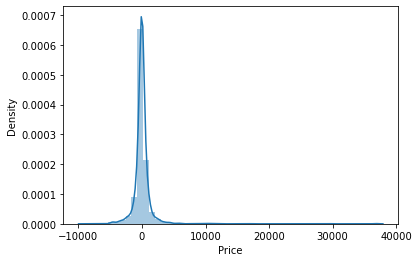

In [202]:
import seaborn as sns
sns.distplot(y_test-y_pred)


In [239]:
#Randomised SearchCv with Random Forest Classifier
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]


In [240]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }

In [241]:
print(random_grid)

{'n_estimators': [100, 136, 172, 209, 245, 281, 318, 354, 390, 427, 463, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [242]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=5,verbose=2,n_jobs=1)

In [243]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=136; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=136; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=136; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=136; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=136; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=463; total time=   6.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=463; total time=   6.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=463

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   verbose=2)

In [244]:
y_pred=rf_random.predict(X_test)

In [245]:
y_pred

array([ 7791.33957392, 13209.70622836, 10581.84029498, ...,
        6489.35410944, 10274.70721142,  2828.78383301])

In [246]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.8510886962175869

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

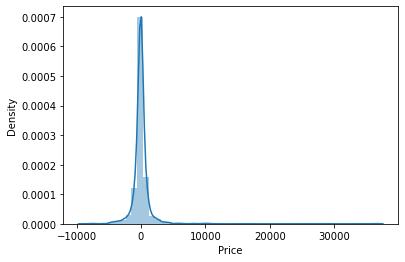

In [247]:
sns.distplot(y_test-y_pred)

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Source'],X_train['Destination'])

NameError: name 'X_train' is not defined